## What is Pandas

- Pandas is an open-source Python library used for data manipulation and analysis.

- It provides two main data structures — Series (1-dimensional) and DataFrame (2-dimensional) — that make it easy to clean, analyze, and handle large datasets efficiently.

- It is widely used in data science, machine learning, and data analytics because it helps perform operations like filtering, grouping, merging, and reshaping data with simple syntax.

https://pandas.pydata.org/about/index.html

## Panda series vs Dataframe:
**Series:**
- 1D labelled array. 
- A single colm
- Store data of similar type
- Eg. A single column in SQL table


**Dataframe:**
- 2D labelled array.
- Multiple Columns
- Different datatypes per columns.
- Eg. A full SQL table.

---

## Pandas Series

A Pandas Series is like a column in a table. It is a 1-D array holding data of any type.

### Importing Pandas

In [1]:
import numpy as np
import pandas as pd

> **Note:** It is common coding practice to import numpy before panda. As panda is build on top of numpy. 

### Series from lists

In [2]:
# string
country = ['India','Pakistan','USA','Nepal','Srilanka']

pd.Series(country)

0       India
1    Pakistan
2         USA
3       Nepal
4    Srilanka
dtype: object

> **Note:** Series have 2 data, value and index.

> **Note:** Series Store Object(String) with their Index. Index can be generated automatically, or explicitly added. 

In [20]:
# integers
runs = [13,24,56,78,100]

runs_ser = pd.Series(runs)
runs_ser

0     13
1     24
2     56
3     78
4    100
dtype: int64

### Custom Index

In [4]:
marks = [67,57,89,100]
subjects = ['maths','english','science','hindi']

pd.Series(marks,index=subjects)

maths       67
english     57
science     89
hindi      100
dtype: int64

### Setting a name, for the series

In [5]:
marks = pd.Series(marks,index=subjects,name='Shivam ke marks')
marks

maths       67
english     57
science     89
hindi      100
Name: Shivam ke marks, dtype: int64

### Series from dict

In [11]:
marks = {
    'maths':67,
    'english':57,
    'science':89,
    'hindi':100
}

marks_series = pd.Series(marks,name='Shivam ke marks')
marks_series

maths       67
english     57
science     89
hindi      100
Name: Shivam ke marks, dtype: int64

---

# Series Attributes

### 1. `size`

In [12]:
marks_series.size

4

### 2. `dtype`

In [13]:
marks_series.dtype

dtype('int64')

### 3. `name`

In [14]:
marks_series.name

'Shivam ke marks'

### 4. `is_unique`

In [16]:
marks_series.is_unique

True

In [ ]:
pd.Series([1,1,2,3,4,5]).is_unique

False

### 5. `index`

In [17]:
marks_series.index

Index(['maths', 'english', 'science', 'hindi'], dtype='object')

In [21]:
runs_ser.index

RangeIndex(start=0, stop=5, step=1)

### 6. values

In [ ]:
marks_series.values

---

### **Series using read_csv:** 
Import CSV file as Series

In [22]:
# with one col
subs = pd.read_csv('../0Resources/DataSets/subs.csv')
subs

,Subscribers gained
0,48
1,57
2,40
3,43
4,44
...,...
360,231
361,226
362,155
363,144


In [23]:
type(subs)

pandas.core.frame.DataFrame

> **Note:** By default, the `read_csv` function, import the data in `DataFrame` format (Even if it is a 1D Column). To convert into a series, we use `.squeeze()` function.

### `squeeze()` function
Use to explicitly convert a DataFrame into a Series.

In [24]:
subs = subs.squeeze()
type(subs)

pandas.core.series.Series

In [26]:
# with 2 cols (index:value)
import pandas as pd
vk = pd.read_csv('../0Resources/DataSets/kohli_ipl.csv',index_col='match_no')
vk = vk.squeeze()
print(vk)
print(type(vk))

match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64
<class 'pandas.core.series.Series'>


In [27]:
movies = pd.read_csv('../0Resources/DataSets/bollywood.csv',index_col='movie').squeeze()
movies

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

---

## Series methods

### 1. Head and tail
- Head returns, first 5 elements from above, where as Tail returns bottm 5 elements.
- We can also specify, how many no. of elements we want. 

In [28]:
subs.head()

0    48
1    57
2    40
3    43
4    44
Name: Subscribers gained, dtype: int64

In [29]:
vk.head(3)

match_no
1     1
2    23
3    13
Name: runs, dtype: int64

In [30]:
vk.tail(10)

match_no
206     0
207     0
208     9
209    58
210    30
211     0
212    20
213    73
214    25
215     7
Name: runs, dtype: int64

### 2. Sample
- Returns, 1 random sample
- We can pass any number, to generate any number of samples

> **Note:** When we need a random elements, we use `.sample()`, as fetching item from the top and bottom may include outliers. 

In [31]:
movies.sample()

movie
Hattrick (film)    Nana Patekar
Name: lead, dtype: object

In [32]:
movies.sample(3)

movie
Riyasat (film)                  Rajesh Khanna
Qarib Qarib Singlle               Irrfan Khan
Jalpari: The Desert Mermaid    Harish Chabbra
Name: lead, dtype: object

### 3. value_counts()
- Give the count of all values(elements)

- `.value_counts()` function is used to count the number of occurrences of each unique value in a column (or a Series).

In [33]:
movies.value_counts()

lead
Akshay Kumar            48
Amitabh Bachchan        45
Ajay Devgn              38
Salman Khan             31
Sanjay Dutt             26
                        ..
Tanishaa Mukerji         1
Tanuja                   1
Ankit                    1
Rakhee Gulzar            1
Geetika Vidya Ohlyan     1
Name: count, Length: 566, dtype: int64

### 4. sort_values()
- Returns Values(by count) in Sorted order.

In [40]:
vk.sort_values() #by default ascending order

match_no
8        0
87       0
93       0
91       0
206      0
      ... 
164    100
120    100
123    108
126    109
128    113
Name: runs, Length: 215, dtype: int64

In [39]:
vk.sort_values(ascending=False) #to sort in descending order

match_no
128    113
126    109
123    108
120    100
164    100
      ... 
93       0
130      0
206      0
207      0
211      0
Name: runs, Length: 215, dtype: int64

In [42]:
vk.sort_values(ascending=False).head(1) #highest value

match_no
128    113
Name: runs, dtype: int64

> **Note:** This is called method chaining

In [46]:
print(vk.sort_values(ascending=False).head(1).values[0])

113


> **Note:** Using ``inplace`` it is a permanent change. No need to reassign like this

```py
movies = movies.sort_index()

# Just do

movies.sort_index(inplace=True)
```

By default `inplce=False`


In [50]:
# sort_index -> inplace -> movies
movies.sort_index(ascending=False,inplace=True)

In [51]:
movies

movie
Zor Lagaa Ke...Haiya!            Meghan Jadhav
Zokkomon                       Darsheel Safary
Zindagi Tere Naam           Mithun Chakraborty
Zindagi Na Milegi Dobara        Hrithik Roshan
Zindagi 50-50                      Veena Malik
                                   ...        
2 States (2014 film)              Arjun Kapoor
1971 (2007 film)                Manoj Bajpayee
1920: The Evil Returns             Vicky Ahuja
1920: London                     Sharman Joshi
1920 (film)                   Rajniesh Duggall
Name: lead, Length: 1500, dtype: object

In [55]:
movies.sort_index(ascending=True,inplace=True)

In [56]:
movies

movie
1920 (film)                   Rajniesh Duggall
1920: London                     Sharman Joshi
1920: The Evil Returns             Vicky Ahuja
1971 (2007 film)                Manoj Bajpayee
2 States (2014 film)              Arjun Kapoor
                                   ...        
Zindagi 50-50                      Veena Malik
Zindagi Na Milegi Dobara        Hrithik Roshan
Zindagi Tere Naam           Mithun Chakraborty
Zokkomon                       Darsheel Safary
Zor Lagaa Ke...Haiya!            Meghan Jadhav
Name: lead, Length: 1500, dtype: object

> **Note:** Permanent sort: Ascending order

---

# Series Maths Methods

### 1. `count`

In [60]:
vk.count()

np.int64(215)

### 2. `sum`

In [61]:
subs.sum()

np.int64(49510)

### 3. `product`

In [62]:
subs.product()

np.int64(0)

> **Note:** Some values are 0, so multiplication will be 0.

### 4. `Mean(), Median(), Mode(), Std(), Var()`

In [64]:
print(subs.mean())
print(vk.median())
print(movies.mode())
print(subs.std())
print(vk.var())

135.64383561643837
24.0
0    Akshay Kumar
Name: lead, dtype: object
62.67502303725269
688.0024777222344


### 5. `min(), max()`

In [66]:
subs.max()

396

In [67]:
subs.min()

33

### 6. `describe()`
- used to generate summary statistics of your DataFrame or Series.

In [68]:
subs.describe()

count    365.000000
mean     135.643836
std       62.675023
min       33.000000
25%       88.000000
50%      123.000000
75%      177.000000
max      396.000000
Name: Subscribers gained, dtype: float64

---

# Series Indexing

### 1. Integer Indexing

In [69]:
x = pd.Series([12,13,14,35,46,57,58,79,9])
x

0    12
1    13
2    14
3    35
4    46
5    57
6    58
7    79
8     9
dtype: int64

### 2. Negative Indexing
- Doesn't support in Series

In [71]:
# x[-1]

# Series Slicing

In [74]:
vk[5:16]

match_no
6      9
7     34
8      0
9     21
10     3
11    10
12    38
13     3
14    11
15    50
16     2
Name: runs, dtype: int64

In [75]:
vk[-5:]

match_no
211     0
212    20
213    73
214    25
215     7
Name: runs, dtype: int64

> **Note:** In a pandas Series, negative indexing is not supported, but negative slicing is supported.

In [76]:
movies[::2]

movie
1920 (film)                 Rajniesh Duggall
1920: The Evil Returns           Vicky Ahuja
2 States (2014 film)            Arjun Kapoor
3 A.M. (2014 film)             Salil Acharya
3 Idiots                          Aamir Khan
                                  ...       
Zero (2018 film)              Shah Rukh Khan
Zila Ghaziabad                  Vivek Oberoi
Zindaggi Rocks                  Sushmita Sen
Zindagi Na Milegi Dobara      Hrithik Roshan
Zokkomon                     Darsheel Safary
Name: lead, Length: 750, dtype: object

# Fancy Indexing in Series

In [77]:
vk[[1,3,4,5]]

match_no
1     1
3    13
4    12
5     1
Name: runs, dtype: int64

## Fancy Indexing: Indexng with labels

In [78]:
movies['2 States (2014 film)']

'Arjun Kapoor'

---

# Editing Series

### 1. Editing using Indexing

In [79]:
marks_series[1] = 100
marks_series

C:\Users\shiva\AppData\Local\Temp\ipykernel_13644\3660931059.py:1: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  marks_series[1] = 100


maths       67
english    100
science     89
hindi      100
Name: Shivam ke marks, dtype: int64

### 2. Editing without index

In [80]:
marks_series['evs'] = 100

In [81]:
marks_series

maths       67
english    100
science     89
hindi      100
evs        100
Name: Shivam ke marks, dtype: int64

### 3. Editing with Slicing

In [87]:
marks_series[2:4] = [90,91]
marks_series

maths       67
english    100
science     90
hindi       91
evs        100
Name: Shivam ke marks, dtype: int64

### 4. Editing with Fancy Indexing

In [91]:
marks_series[[0,3,4]] = [0,0,0]
marks_series

C:\Users\shiva\AppData\Local\Temp\ipykernel_13644\1343337680.py:1: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  marks_series[[0,3,4]] = [0,0,0]


maths        0
english    100
science     90
hindi        0
evs          0
Name: Shivam ke marks, dtype: int64

### 5. Editing with index label

In [96]:
movies['2 States (2014 film)'] = 'Alia Bhatt'
movies['2 States (2014 film)']

'Alia Bhatt'

### Copy and Views

---

# Series with Python Functionalities

### 1. `len(), type(), dir(), sorted(), max(), min()`

In [98]:
print(len(subs))
print(type(subs))
print(min(subs))
print(max(subs))

365
<class 'pandas.core.series.Series'>
33
396


In [ ]:
print(dir(subs))  # all attributes and methods

['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__bool__', '__class__', '__column_consortium_standard__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__firstlineno__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pandas_priority__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__',

In [101]:
print(sorted(subs)) # sort but store in list

[33, 33, 35, 37, 39, 40, 40, 40, 40, 42, 42, 43, 44, 44, 44, 45, 46, 46, 48, 49, 49, 49, 49, 50, 50, 50, 51, 54, 56, 56, 56, 56, 57, 61, 62, 64, 65, 65, 66, 66, 66, 66, 67, 68, 70, 70, 70, 71, 71, 72, 72, 72, 72, 72, 73, 74, 74, 75, 76, 76, 76, 76, 77, 77, 78, 78, 78, 79, 79, 80, 80, 80, 81, 81, 82, 82, 83, 83, 83, 84, 84, 84, 85, 86, 86, 86, 87, 87, 87, 87, 88, 88, 88, 88, 88, 89, 89, 89, 90, 90, 90, 90, 91, 92, 92, 92, 93, 93, 93, 93, 95, 95, 96, 96, 96, 96, 97, 97, 98, 98, 99, 99, 100, 100, 100, 101, 101, 101, 102, 102, 103, 103, 104, 104, 104, 105, 105, 105, 105, 105, 105, 105, 105, 105, 108, 108, 108, 108, 108, 108, 109, 109, 110, 110, 110, 111, 111, 112, 113, 113, 113, 114, 114, 114, 114, 115, 115, 115, 115, 117, 117, 117, 118, 118, 119, 119, 119, 119, 120, 122, 123, 123, 123, 123, 123, 124, 125, 126, 127, 128, 128, 129, 130, 131, 131, 132, 132, 134, 134, 134, 135, 135, 136, 136, 136, 137, 138, 138, 138, 139, 140, 144, 145, 146, 146, 146, 146, 147, 149, 150, 150, 150, 150, 151, 1

### 2. Type Conversion

In [102]:
list(marks_series)

[0, 100, 90, 0, 0]

In [103]:
dict(marks_series)

{'maths': np.int64(0),
 'english': np.int64(100),
 'science': np.int64(90),
 'hindi': np.int64(0),
 'evs': np.int64(0)}

### 3. Membership Operator (`in`, `not in`)

In [104]:
'2 States (2014 film)' in movies

True

In [105]:
'Alia Bhatt' in movies.values

True

### 4. Looping

In [ ]:
for i in movies.index:
  print(i)

### 5. Arithmetic Operators (Broadcasting)

In [108]:
100 + marks_series

maths      100
english    200
science    190
hindi      100
evs        100
Name: Shivam ke marks, dtype: int64

### 6. Relational Operators

In [109]:
vk >= 50

match_no
1      False
2      False
3      False
4      False
5      False
       ...  
211    False
212    False
213     True
214    False
215    False
Name: runs, Length: 215, dtype: bool

### 7. Boolean Indexing on Series

In [110]:
# Find no of 50's and 100's scored by kohli
vk[vk >= 50].size

50

In [112]:
# find number of ducks
vk[vk == 0].size

9

In [113]:
# Count number of day when Nitish Sir(Campusx) had more than 200 subs a day
subs[subs > 200].size

59

In [114]:
# find actors who have done more than 20 movies
num_movies = movies.value_counts()
num_movies[num_movies > 20]

lead
Akshay Kumar        48
Amitabh Bachchan    45
Ajay Devgn          38
Salman Khan         31
Sanjay Dutt         26
Shah Rukh Khan      22
Emraan Hashmi       21
Name: count, dtype: int64

---

# Plotting Graphs on Series

<Axes: >

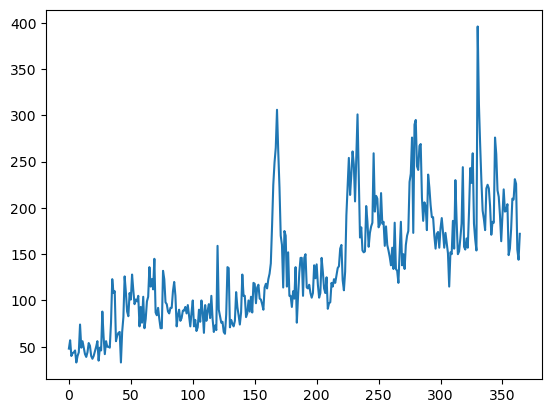

In [115]:
subs.plot()

<Axes: xlabel='lead'>

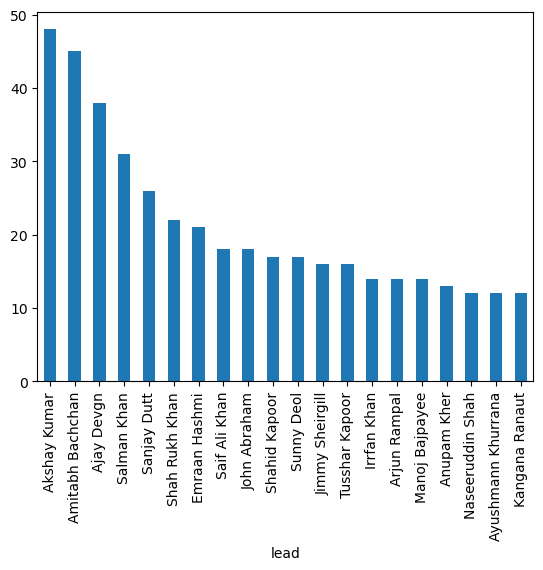

In [117]:
movies.value_counts().head(20).plot(kind='bar')

<Axes: ylabel='count'>

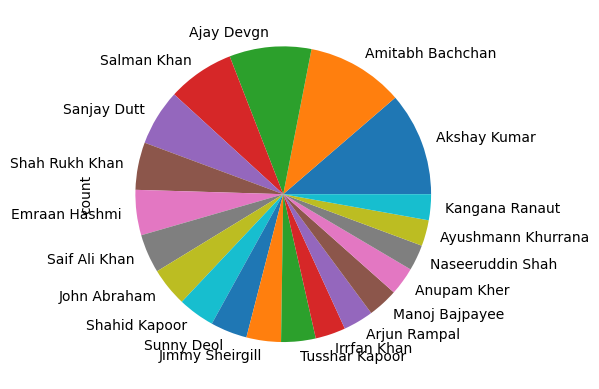

In [116]:
movies.value_counts().head(20).plot(kind='pie')

### Some Important Series Methods

In [ ]:
# astype
# between
# clip
# drop_duplicates
# isnull
# dropna
# fillna
# isin
# apply
# copy

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
subs = pd.read_csv('/content/subs.csv',squeeze=True)
subs

In [ ]:
vk = pd.read_csv('/content/kohli_ipl.csv',index_col='match_no',squeeze=True)
vk

In [ ]:
movies = pd.read_csv('/content/bollywood.csv',index_col='movie',squeeze=True)
movies

In [ ]:
# astype
import sys
sys.getsizeof(vk)

In [ ]:
sys.getsizeof(vk.astype('int16'))

In [ ]:
# between
vk[vk.between(51,99)].size

In [ ]:
# clip
subs

In [ ]:
subs.clip(100,200)

In [ ]:
# drop_duplicates
temp = pd.Series([1,1,2,2,3,3,4,4])
temp

In [ ]:
temp.drop_duplicates(keep='last')

In [ ]:
temp.duplicated().sum()

In [ ]:
vk.duplicated().sum()

In [ ]:
movies.drop_duplicates()

In [ ]:
temp = pd.Series([1,2,3,np.nan,5,6,np.nan,8,np.nan,10])
temp

In [ ]:
temp.size

In [ ]:
temp.count()

In [ ]:
# isnull
temp.isnull().sum()

In [ ]:
# dropna
temp.dropna()

In [ ]:
# fillna
temp.fillna(temp.mean())

In [ ]:
# isin
vk[(vk == 49) | (vk == 99)]

In [ ]:
vk[vk.isin([49,99])]

In [ ]:
# apply
movies

In [ ]:
movies.apply(lambda x:x.split()[0].upper())

In [ ]:
subs

In [ ]:
subs.apply(lambda x:'good day' if x > subs.mean() else 'bad day')

In [ ]:
subs.mean()

In [ ]:
# copy

In [ ]:
vk

In [ ]:
new = vk.head()

In [ ]:
new

In [ ]:
new[1] = 1

In [ ]:
new = vk.head().copy()

In [ ]:
new[1] = 100

In [ ]:
new

In [ ]:
vk